# nettoyage des données
## Importation des modules et données, et analyse superficiel

In [2]:



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_customers = pd.read_csv("dataset_P4/customers.csv", sep=",") #lire fichier csv
data_products  = pd.read_csv("dataset_P4/products.csv", sep=",") #lire fichier csv
data_transactions  = pd.read_csv("dataset_P4/transactions.csv", sep=",") #lire fichier csv

data_products["categ"].unique() # 3 catégorie

data_transactions["id_prod"].nunique() #=3266 produit différent vendu
data_products["id_prod"].nunique() #=3287 produit en stock

date_achat_trié = data_transactions.sort_values(by = 'date', ascending = False).head(30) #observer les valeurs limite des transactions


np.mean(data_products[data_products["categ"] == 0]["price"])
np.mean(data_products[data_products["categ"] == 1]["price"])
np.mean(data_products[data_products["categ"] == 2]["price"])
# prix moyen par catégorie 2 (108,35) 1 (25,53) 0 (11,72)

data_transactions["client_id"].nunique()
data_customers["client_id"].nunique()
# 8602 client ont fait des transaction sur 8623 client

data_customers.isnull().any() #pas de null/nan dans customers
data_products.isnull().any() #pas de null/nan dans produit
data_transactions.isnull().any() #pas de null/nan dans produit

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool


## Rassemblement et nettoyage des données dans un unique data frame
### gestion des valeurs null et outliers


In [3]:
trans_prod = pd.merge(data_transactions,data_products,
            left_on=["id_prod"],
            right_on=["id_prod"],  how = 'outer')

trans_customers = pd.merge(data_transactions,data_customers,
            left_on=["client_id"],
            right_on=["client_id"],  how = 'outer')


trans_prod_Nan = trans_prod[trans_prod.isnull().any(axis=1)] #voir les données avec des NaN

trans_prod_Nan_prodnonvendu = trans_prod_Nan[trans_prod_Nan["id_prod"] != "0_2245"] #prod 0_2245 n'a pas de prix


l'id_prod 0_2245 n'a pas de prix ni de catégorie 
liste des 22 id produits qui n'ont pas été vendu cette année : 

['0_1016', '0_1780', '0_1062', '0_1119', '0_1014', '1_0', '0_1318','0_1800', '0_1645', '0_322', '0_1620', '0_1025', '2_87', 1_394','2_72', '0_310', '0_1624', '0_525', '2_86', '0_299', '0_510','0_2308']

outliers : 4 big customers, ['c_1609', 'c_3454', 'c_4958', 'c_6714']

### recherche des valeurs de prix négatifs

In [4]:
trans_prod_prixneg = trans_prod[trans_prod["price"] <= 0]


(trans_prod_prixneg["id_prod"].unique())

array(['T_0'], dtype=object)

liste des id produits qui ont un prix négatif : T_0

### Recherche des clients qui n'ont pas réaliser de transaction cette année

In [5]:
trans_customers_NaN = trans_customers[trans_customers.isnull().any(axis=1)] #nan entre transaction et consumers
clients_sans_achats = trans_customers_NaN["client_id"].unique()
(trans_customers_NaN["client_id"].unique())

array(['c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443', 'c_4447',
       'c_3017', 'c_4086', 'c_6930', 'c_4358', 'c_8381', 'c_1223',
       'c_6862', 'c_5245', 'c_5223', 'c_6735', 'c_862', 'c_7584', 'c_90',
       'c_587', 'c_3526'], dtype=object)

liste des client_id qui n'ont jamais réaliser de commande :
c_8253 c_3789 c_4406 c_2706 c_3443 c_4447 c_3017 c_4086 c_6930 c_4358 c_8381 c_1223 c_6862 c_5245 c_5223 c_6735 c_862 c_7584 c_90 c_587 c_3526

### rassemblement des données dans une unique data frame en suprimant les valeurs incohérentes

In [6]:
trans_prod_custo = pd.merge(trans_prod,data_customers,
            left_on=["client_id"],
            right_on=["client_id"]) #,  how = 'inner') inner permet d'enlever les client qu n'ont pas réaliser de transaction



# filtre_nan_incoherent = 

trans_prod_custo_cleannan = trans_prod_custo[~((trans_prod_custo["id_prod"] == "T_0") | (trans_prod_custo["id_prod"] == "0_2245"))]

# %store trans_prod_custo_cleannan #permet de transmettre variable à un autre NB
display(trans_prod_custo_cleannan)

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977
...,...,...,...,...,...,...,...,...
337011,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967
337012,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933
337013,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933
337014,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970


### calcul de l'âges des clients

In [7]:

trans_prod_custo_cleannan["date"] = pd.to_datetime(trans_prod_custo_cleannan["date"])


trans_prod_custo_cleannan["age transact"] = trans_prod_custo_cleannan["date"].dt.year - trans_prod_custo_cleannan["birth"] +1


trans_prod_custo_cleannan.sort_values(by="age transact")

<ipython-input-7-8cf7b5d4e6ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_prod_custo_cleannan["date"] = pd.to_datetime(trans_prod_custo_cleannan["date"])
<ipython-input-7-8cf7b5d4e6ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_prod_custo_cleannan["age transact"] = trans_prod_custo_cleannan["date"].dt.year - trans_prod_custo_cleannan["birth"] +1


,id_prod,date,session_id,client_id,price,categ,sex,birth,age transact
238377,2_139,2021-08-08 10:41:22.378893,s_72943,c_6668,82.99,2.0,f,2004,18
332620,0_1210,2021-06-19 15:39:17.464938,s_50875,c_7533,16.44,0.0,f,2004,18
332617,0_1607,2021-06-19 14:57:53.354222,s_50875,c_7533,3.99,0.0,f,2004,18
332616,2_137,2021-04-03 19:57:45.014864,s_15557,c_7533,83.99,2.0,f,2004,18
332613,2_10,2021-05-25 14:05:14.196078,s_39362,c_7533,60.37,2.0,f,2004,18
...,...,...,...,...,...,...,...,...,...
76592,0_1449,2022-02-06 22:10:09.281708,s_161070,c_577,4.99,0.0,m,1929,94
314548,1_279,2022-01-02 14:34:17.875242,s_143905,c_8362,27.99,1.0,f,1929,94
314549,0_1503,2022-01-02 14:27:57.727151,s_143905,c_8362,15.99,0.0,f,1929,94
323079,0_1053,2022-01-16 16:36:38.899681,s_150732,c_5302,10.99,0.0,m,1929,94



## analyse des ventes mensuelles par catégorie

### préparation des filtres par catégorie et par période

In [8]:

categ0 = (trans_prod_custo_cleannan[trans_prod_custo_cleannan["categ"] == 0])
categ0_mont = categ0.groupby(categ0["date"].dt.month).sum()
categ0_week = categ0.groupby(categ0["date"].dt.week).sum()

categ1 = (trans_prod_custo_cleannan[trans_prod_custo_cleannan["categ"] == 1])
categ1_mont = categ1.groupby(categ1["date"].dt.month).sum()
categ1_week = categ1.groupby(categ1["date"].dt.week).sum()

categ2 = (trans_prod_custo_cleannan[trans_prod_custo_cleannan["categ"] == 2.0])
categ2_mont = categ2.groupby(categ2["date"].dt.month).sum()
categ2_week = categ2.groupby(categ2["date"].dt.week).sum()


categ1["categ"].dtypes
categ1_mont

,price,categ,birth,age transact
date,,,,
1,256267.92,12560.0,24796371,612509
2,213120.64,10459.0,20646535,512022
3,186974.17,9134.0,18035620,433328
4,156138.35,7579.0,14962506,362232
5,165893.40,8107.0,16006088,386266
6,189162.04,9264.0,18293410,438398
7,188523.27,9169.0,18106144,433574
8,162991.38,7954.0,15706046,376942
9,190613.78,9268.0,18293768,446128


## Analyse des ventes par catégorie
### Analyse des ventes de la catégorie 0

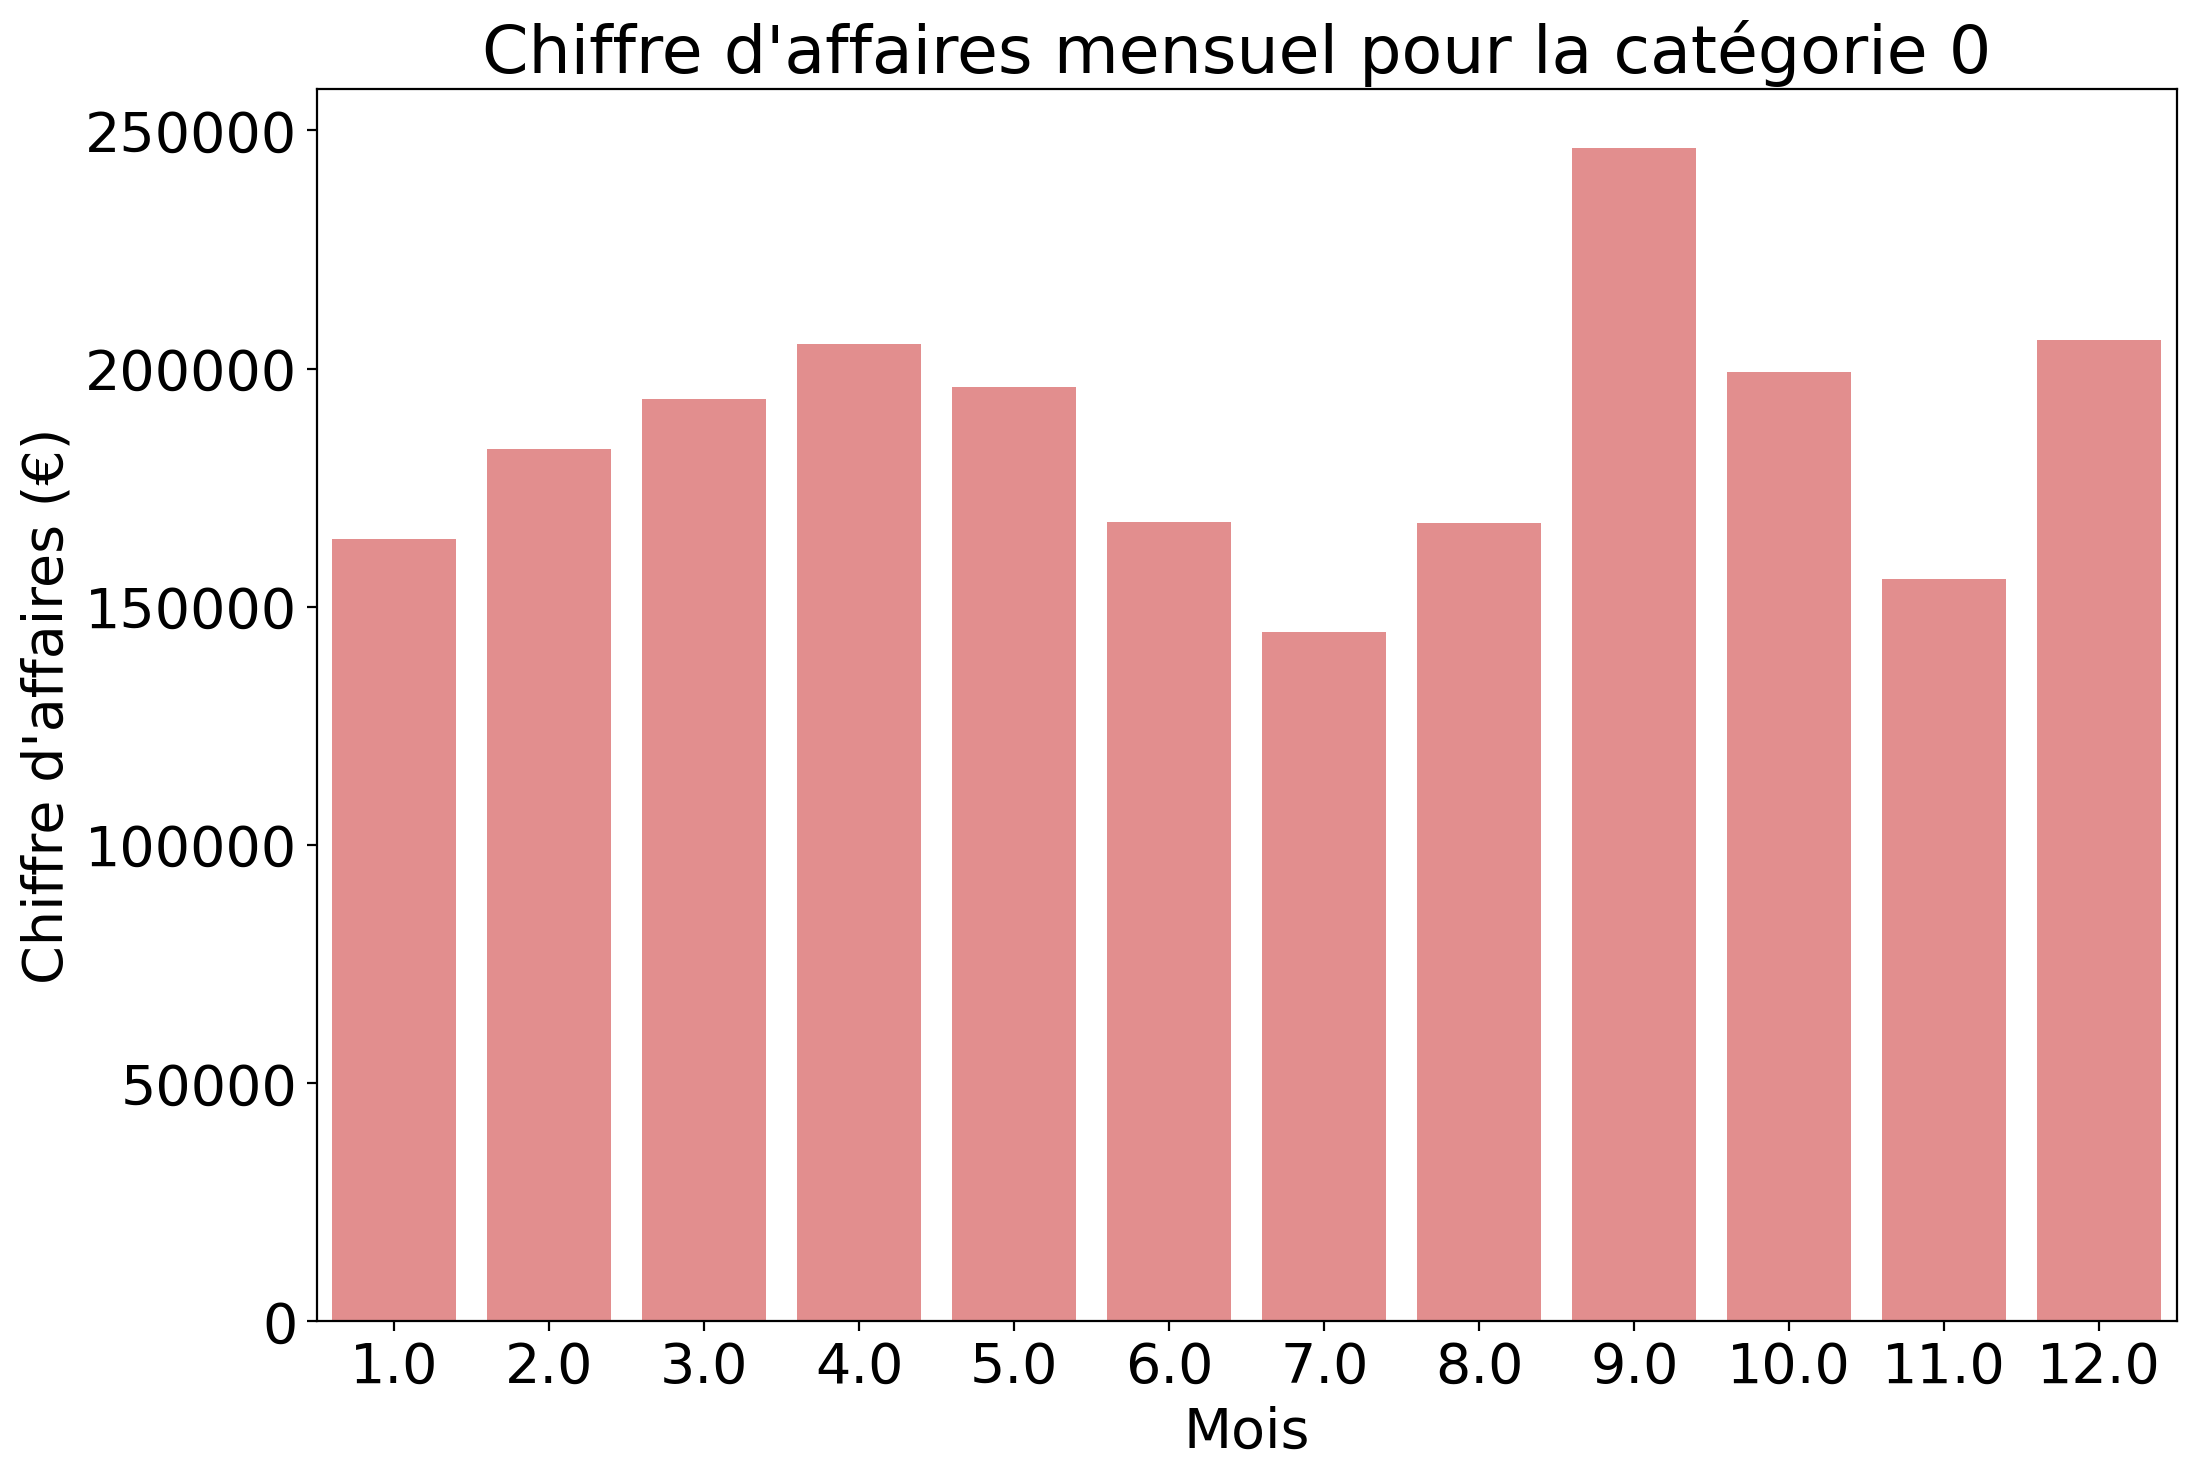

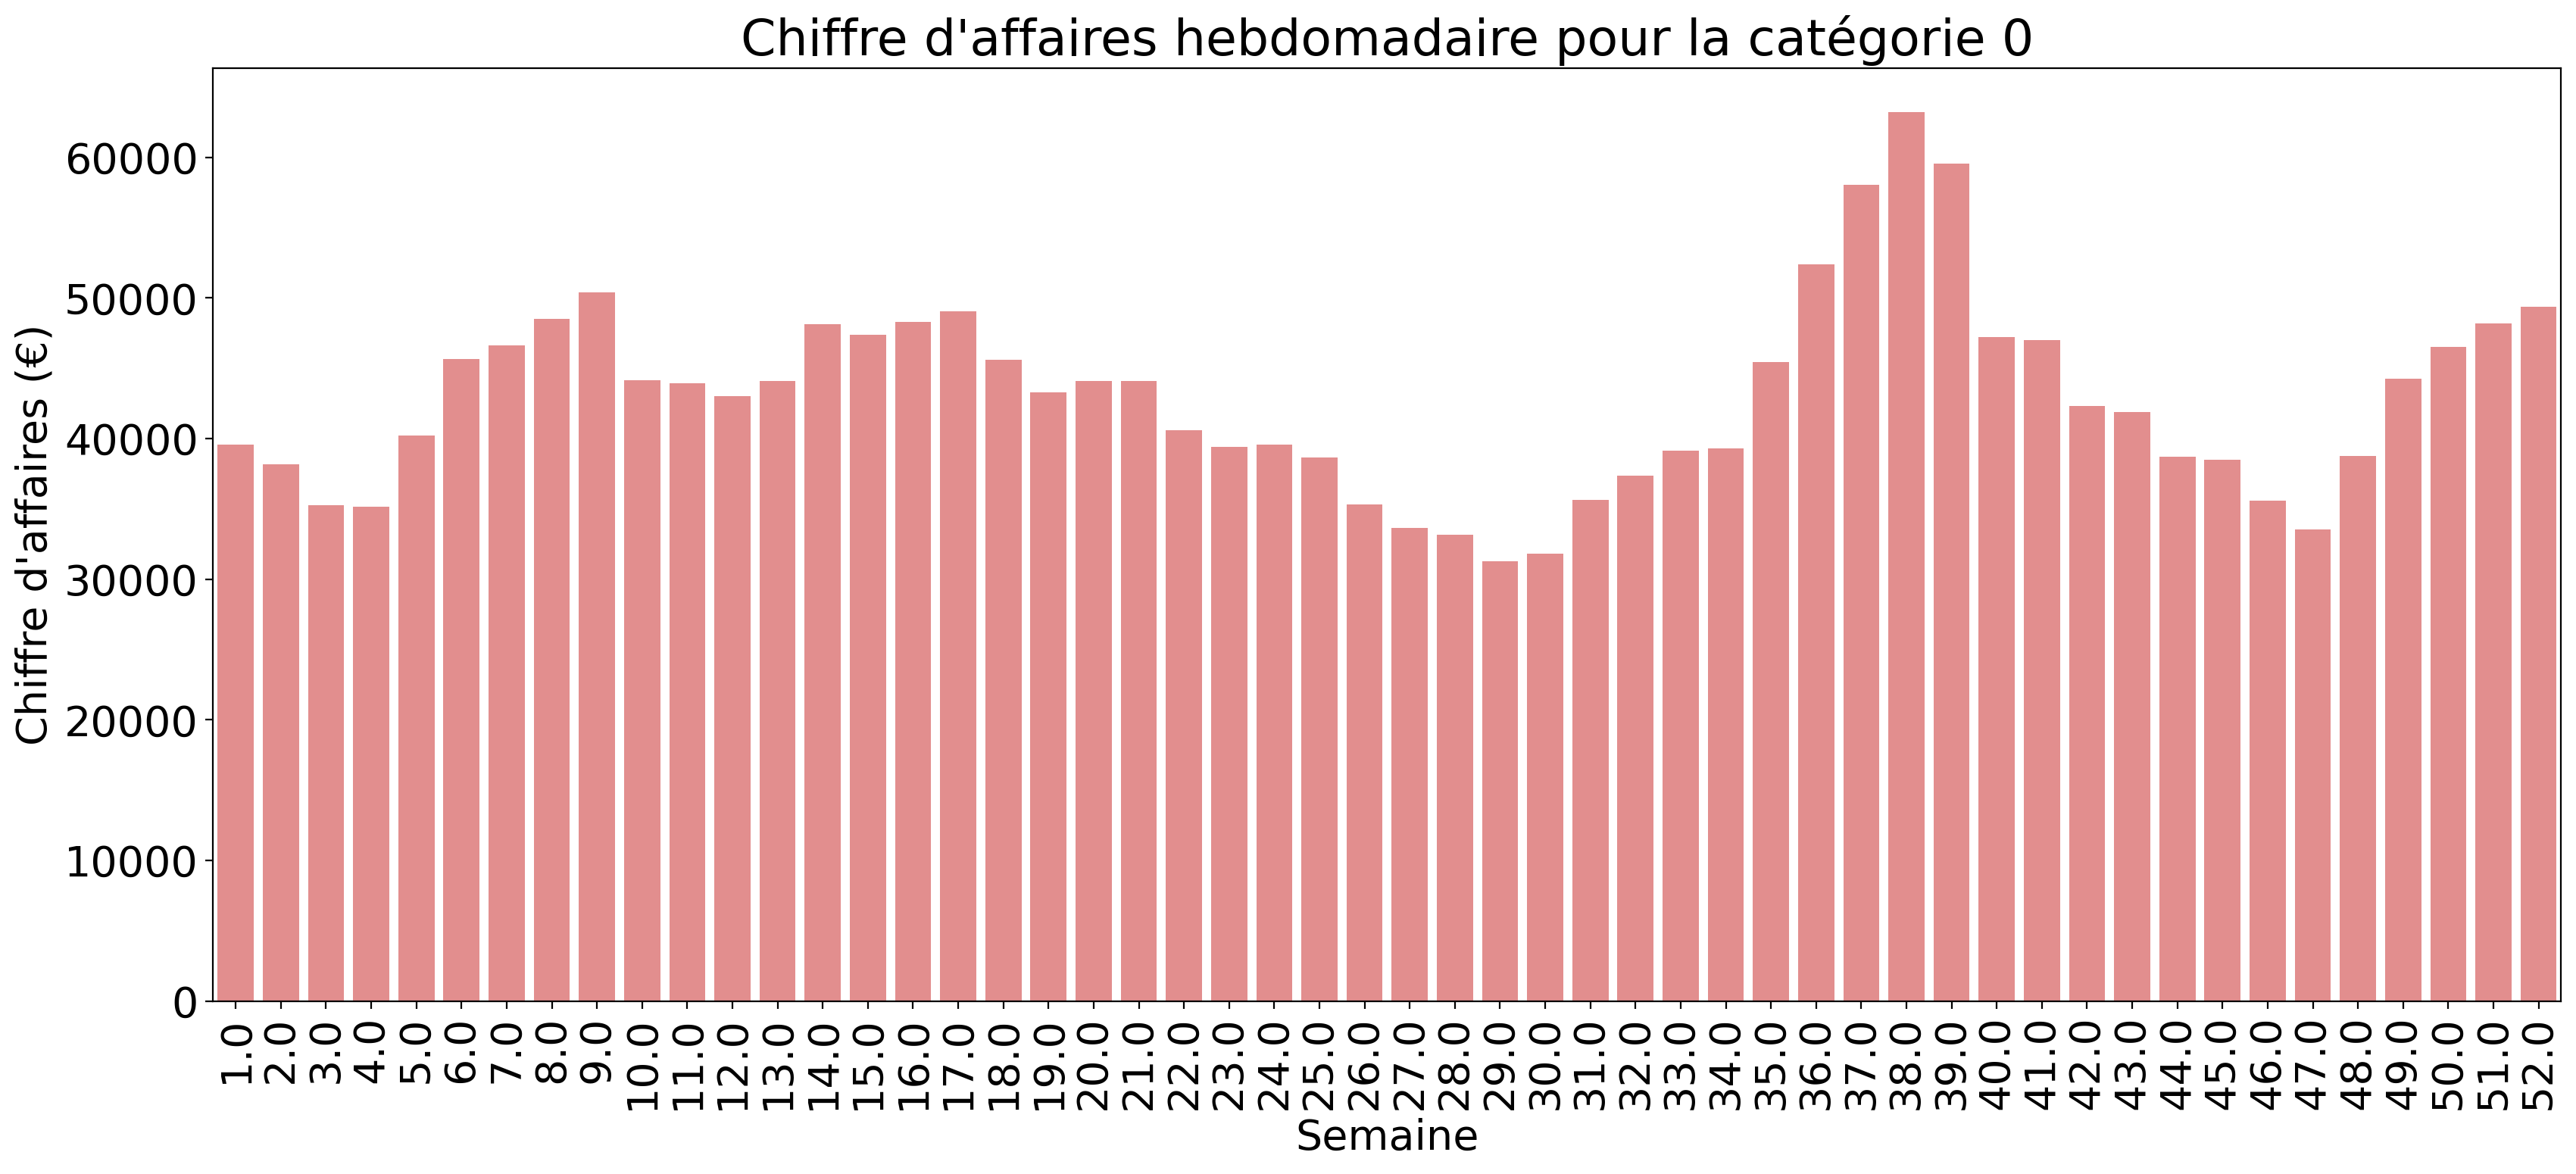

In [9]:
categ0_mont["month"] = np.linspace(1,12, num= 12)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,8), dpi=200)

#sns.set_color_codes('pastel')
sns.barplot(x="month", y=categ0_mont["price"], 
            data=categ0_mont,
            label='catégorie 0',
            color='lightcoral')
plt.title("Chiffre d'affaires mensuel pour la catégorie 0 ")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Mois")
plt.show()


categ0_week["week"] = np.linspace(1,52, num= 52)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,8), dpi=200)

#sns.set_color_codes('pastel')
sns.barplot(x="week", y="price", 
            data=categ0_week,
            label='catégorie 0',
            color='lightcoral')
plt.xticks(rotation=90)

plt.title("Chiffre d'affaires hebdomadaire pour la catégorie 0")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Semaine")
plt.show()

### Analyse des ventes de la catégorie 1

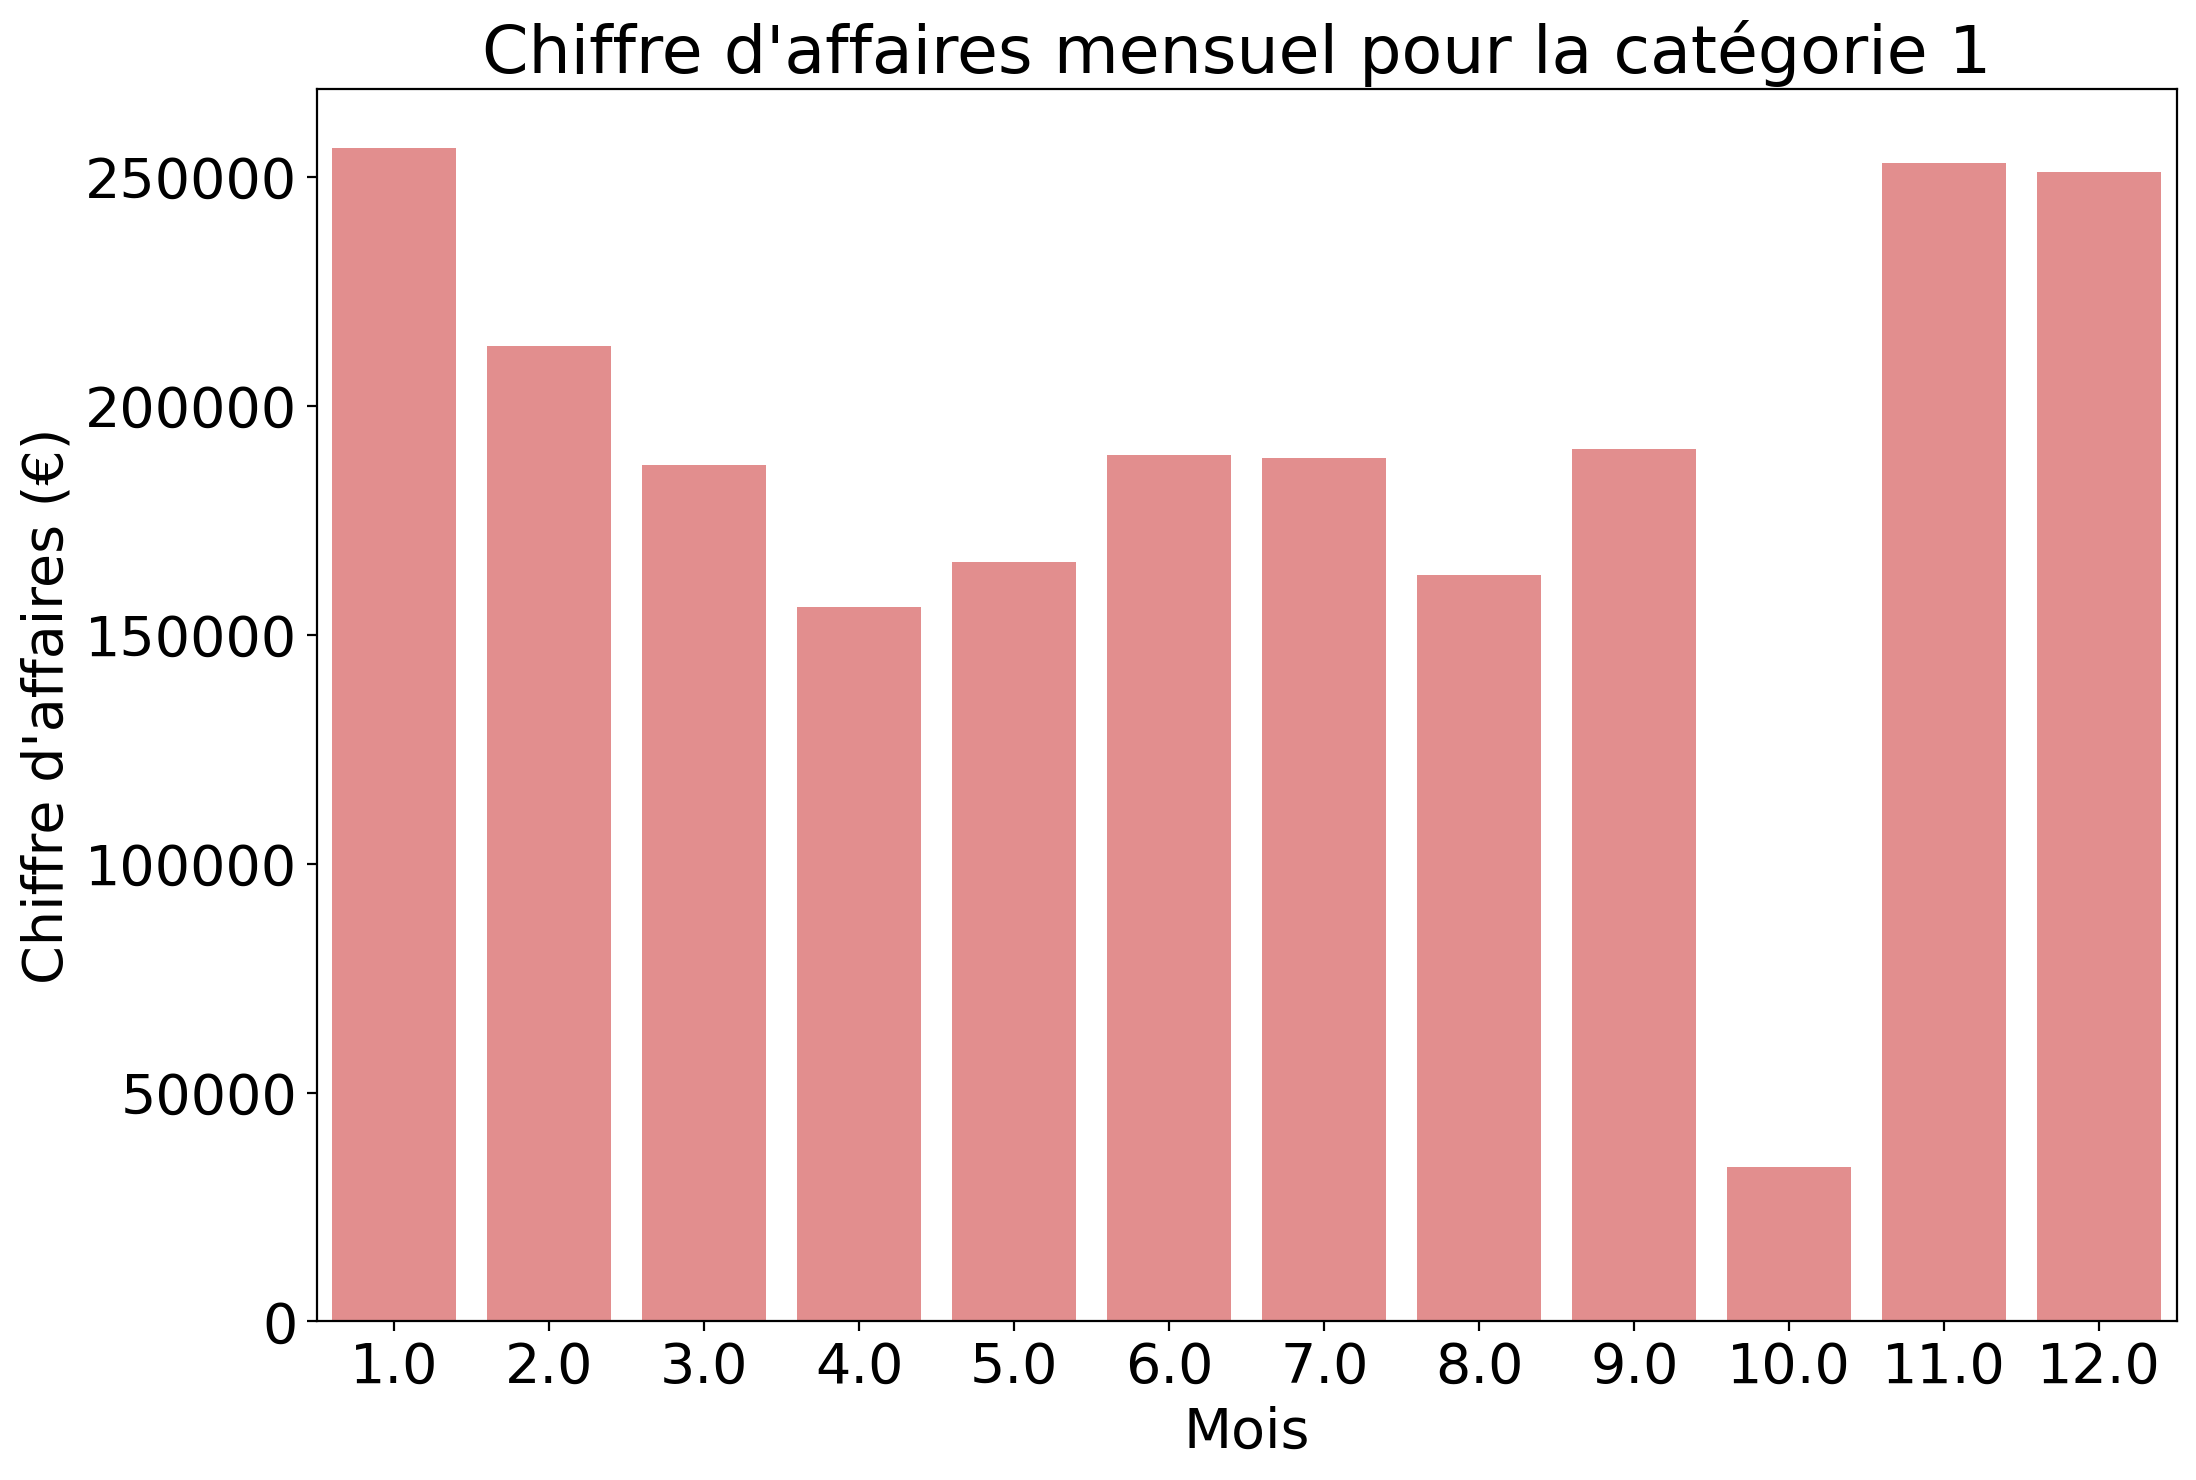

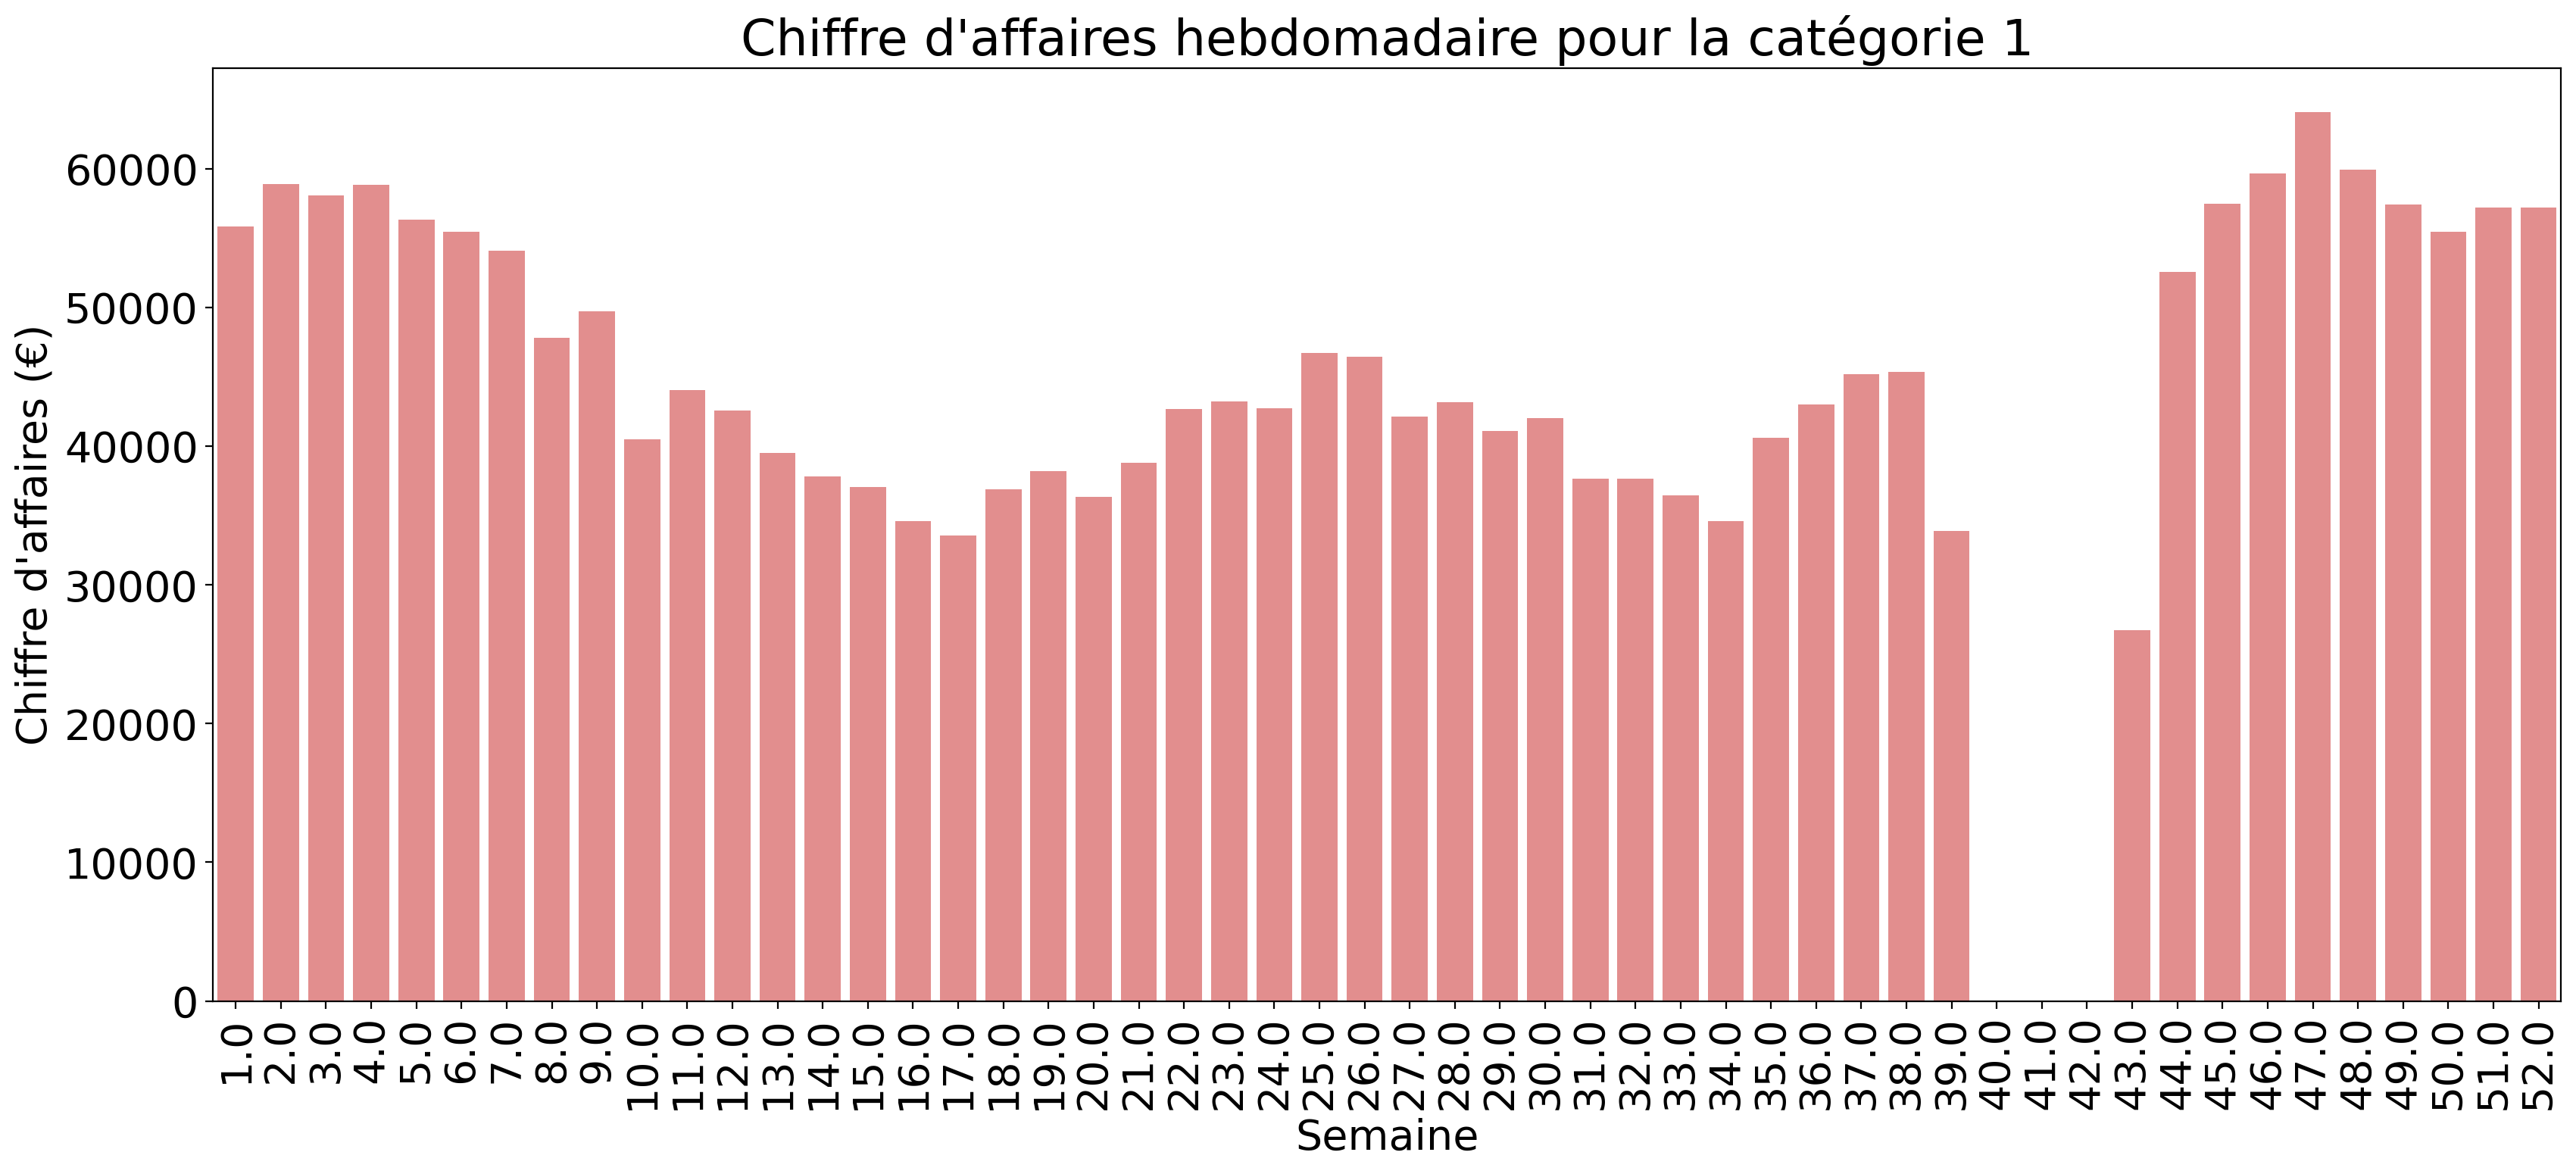

In [10]:
categ1_mont["month"] = np.linspace(1,12, num= 12)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,8), dpi=200)

#sns.set_color_codes('pastel')
sns.barplot(x="month", y=categ1_mont["price"], 
            data=categ1_mont,
            label='catégorie 1',
            color='lightcoral')
plt.title("Chiffre d'affaires mensuel pour la catégorie 1 ")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Mois")
plt.savefig('./dataset_P4/Categ1_month.png')
plt.show()

#rajout de 0 pour les valeurs manquante pour les semaines 40 , 41 et 42
categ1_week.loc[40]=[ 0, 0, 0, 0 ]
categ1_week.loc[41]=[ 0, 0, 0, 0 ]
categ1_week.loc[42]=[ 0, 0, 0, 0 ]

#réorganisation de l'index
categ1_week_clean = categ1_week.sort_values(by = "date" )

categ1_week_clean["week"] = np.linspace(1,52, num= 52)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,8), dpi=200)

sns.barplot(x="week", y="price", 
            data=categ1_week_clean,
            label='catégorie 0',
            color='lightcoral')
plt.xticks(rotation=90)

plt.title("Chiffre d'affaires hebdomadaire pour la catégorie 1")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Semaine")
plt.savefig('./dataset_P4/Categ1_week.png')
plt.show()

on peut voir qu'il manque des ventes des produits de la catégorie 1 pour les semaines 39 à 43

### imputation des données pour les 3 semaines manquantes
#### détermination des valeurs manquantes

In [13]:
#mask and determination of missing values
categ1_week_clean_CAmodif_rajouter = (categ1_week_clean[(categ1_week_clean["week"] >= 38) & (categ1_week_clean["week"] <= 44)])
categ1_week_clean_CAmodif_rajouter["imputation CA"] = np.linspace(45377.30,52547.98, num= 7, dtype = int)
(categ1_week_clean_CAmodif_rajouter["CA to add"]) = (categ1_week_clean_CAmodif_rajouter["imputation CA"]) - (categ1_week_clean_CAmodif_rajouter["price"]) 

display(categ1_week_clean_CAmodif_rajouter)

<ipython-input-13-d1c184168cdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ1_week_clean_CAmodif_rajouter["imputation CA"] = np.linspace(45377.30,52547.98, num= 7, dtype = int)
<ipython-input-13-d1c184168cdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (categ1_week_clean_CAmodif_rajouter["CA to add"]) = (categ1_week_clean_CAmodif_rajouter["imputation CA"]) - (categ1_week_clean_CAmodif_rajouter["price"])


,price,categ,birth,age transact,week,imputation CA,CA to add
date,,,,,,,
38,45377.30,2226.0,4393166,107806,38.0,45377,-0.30
39,33918.16,1645.0,3246828,79362,39.0,46572,12653.84
40,0.00,0.0,0,0,40.0,47767,47767.00
41,0.00,0.0,0,0,41.0,48962,48962.00
42,0.00,0.0,0,0,42.0,50157,50157.00
43,26758.53,1322.0,2610360,62724,43.0,51352,24593.47
44,52547.98,2592.0,5117266,123758,44.0,52547,-0.98


Avec le tableau précedent nous connaissons donc les transactions à rajouter pour conserver la linéarité du CA

#### Ajout des valeurs manquantes dans les transactions

In [14]:
# Create Dataframe
dfimputation = pd.DataFrame(columns = ['id_prod', 'date', 'session_id', 'client_id', "price", "categ", "birth", "age transact"])
# Create unique product fot each week
dfimputation["id_prod"] = (np.linspace(38,44, num= 7, dtype = int))
dfimputation["id_prod"] = dfimputation["id_prod"].apply(lambda _: str(_))
dfimputation["id_prod"] = "3_" + dfimputation["id_prod"]
# Create transaction's date
dfimputation["date"] = pd.date_range('20/09/2021', periods=7, freq='W') 


# add info to haven't NaN
dfimputation["session_id"] = "s_imput"
dfimputation["client_id"] = "c_imput"
dfimputation["categ"] = 1
dfimputation["birth"] = 2000
dfimputation["age transact"] = 21
dfimputation["sex"] = "m"
# append values to compense missing value 
dfimputation["price"] = ([0, 12653, 47767, 48962, 50157, 24593, 0,])



data_librairie_imputation_values = trans_prod_custo_cleannan.append(dfimputation.drop([0,6]))
data_librairie_imputation_values

,id_prod,date,session_id,client_id,price,categ,sex,birth,age transact
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,45
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977,45
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977,45
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977,45
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977,45
...,...,...,...,...,...,...,...,...,...
1,3_39,2021-10-03 00:00:00.000000,s_imput,c_imput,12653.00,1.0,m,2000,21
2,3_40,2021-10-10 00:00:00.000000,s_imput,c_imput,47767.00,1.0,m,2000,21
3,3_41,2021-10-17 00:00:00.000000,s_imput,c_imput,48962.00,1.0,m,2000,21
4,3_42,2021-10-24 00:00:00.000000,s_imput,c_imput,50157.00,1.0,m,2000,21


#### Analyse des ventes de la catégorie 1 après imputations 

<ipython-input-15-93ccc2fe6061>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_librairie_imputation_values_categ1["date"] = pd.to_datetime(data_librairie_imputation_values_categ1["date"])


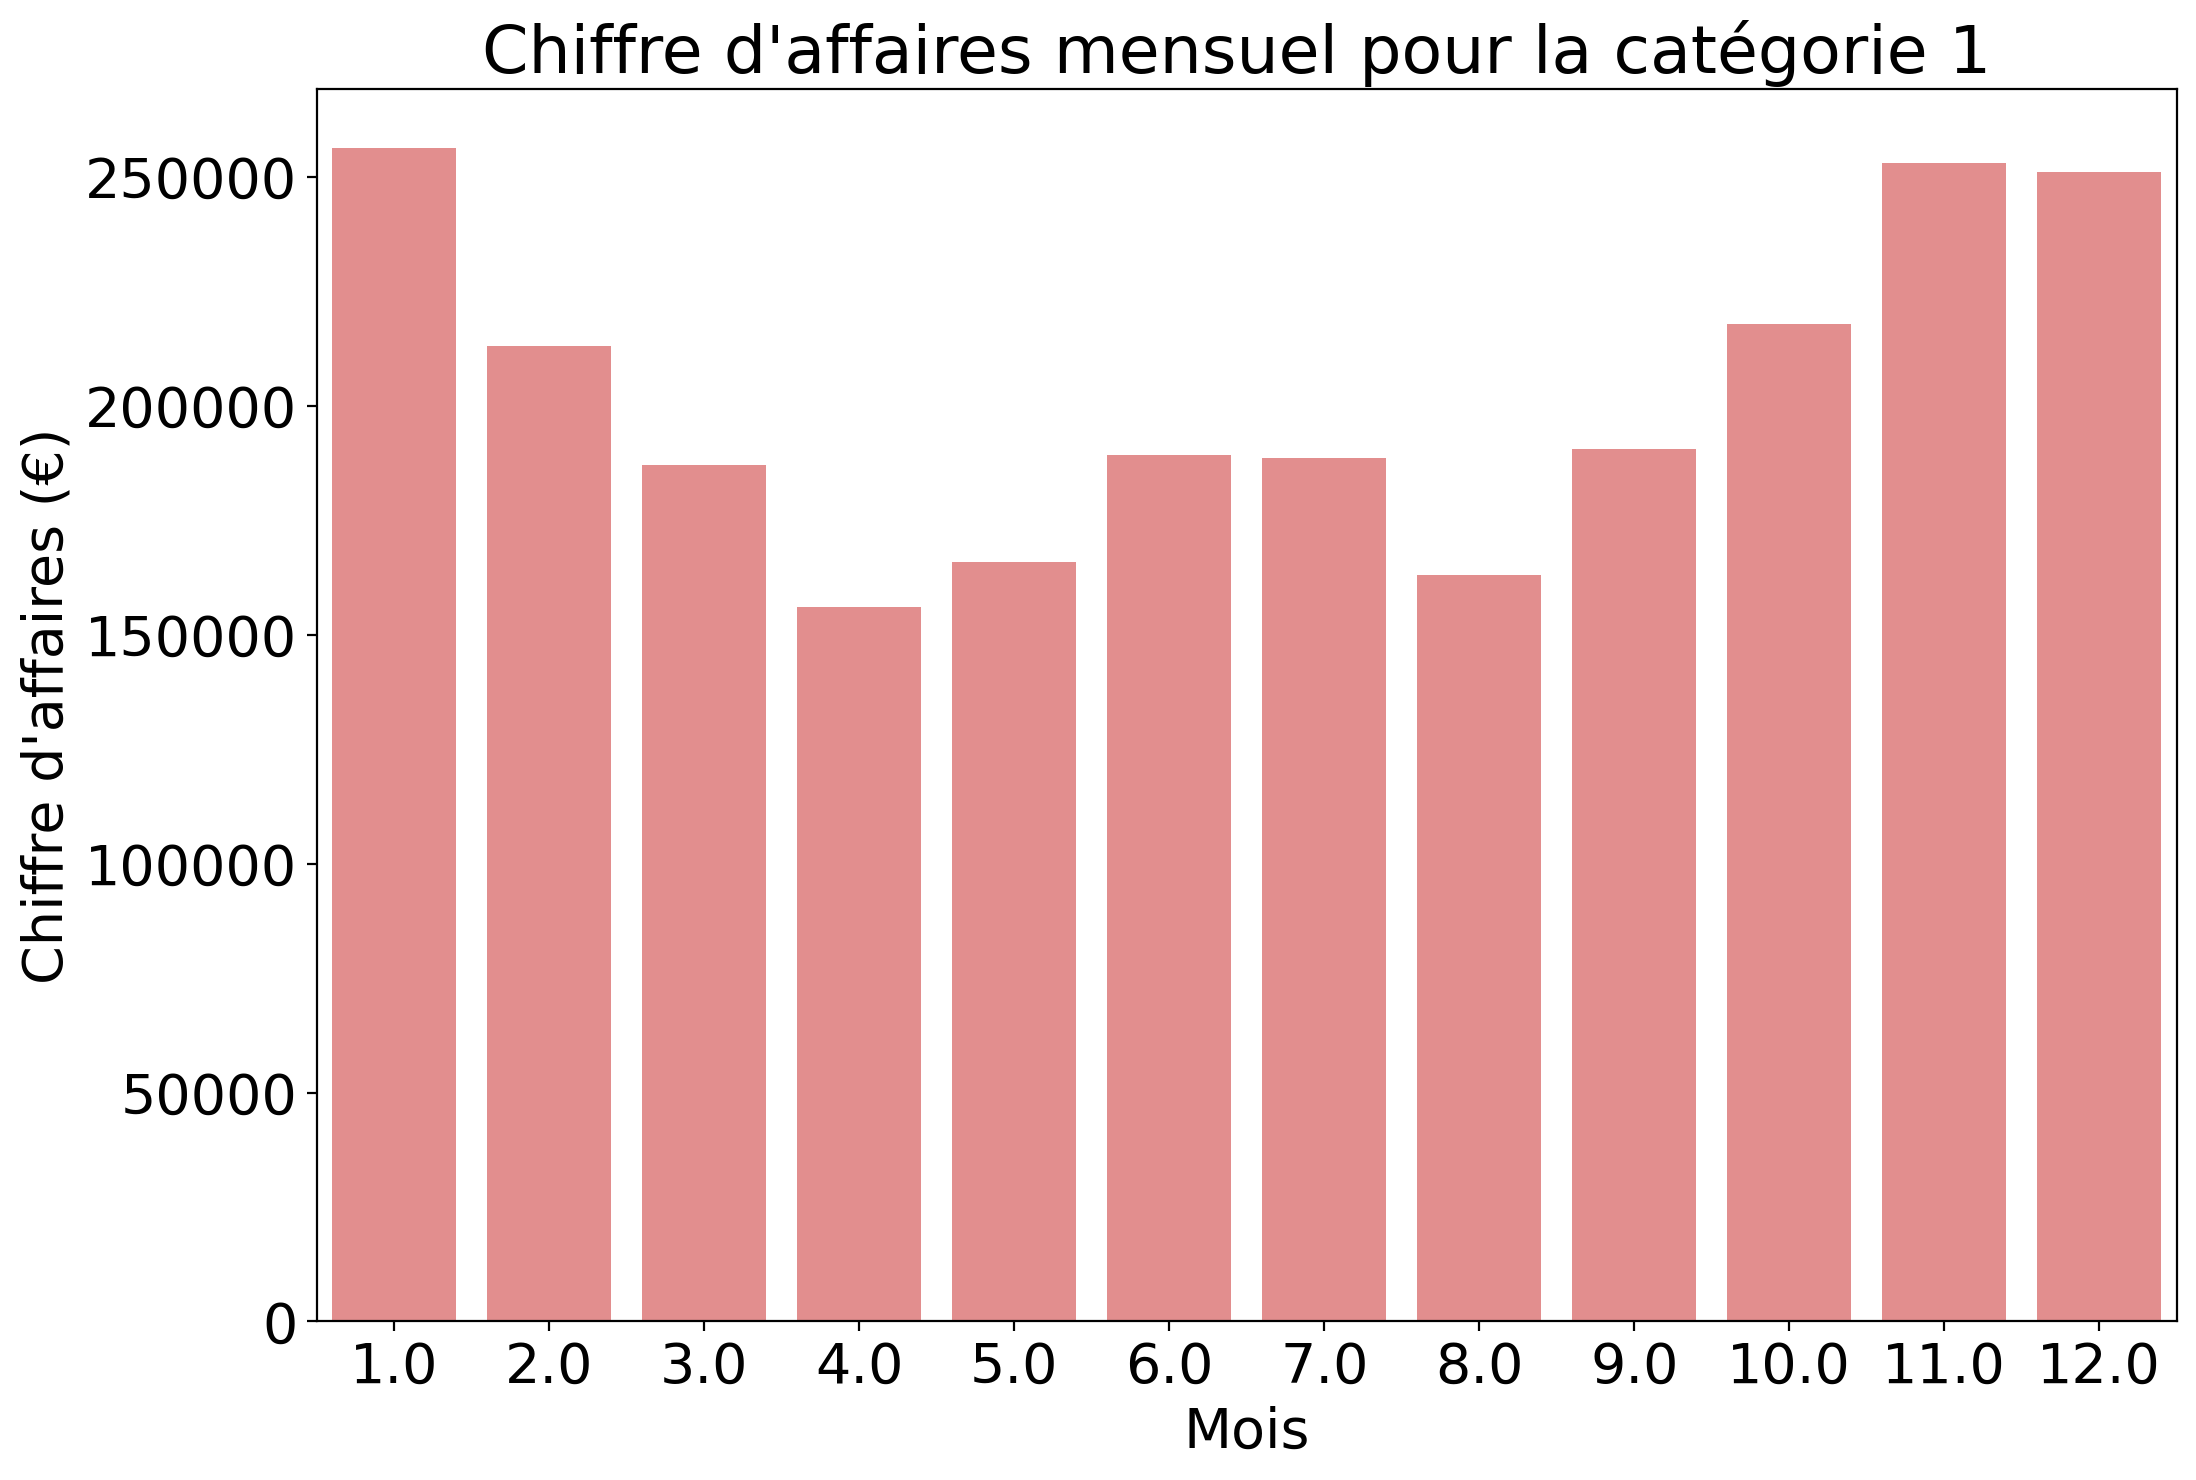

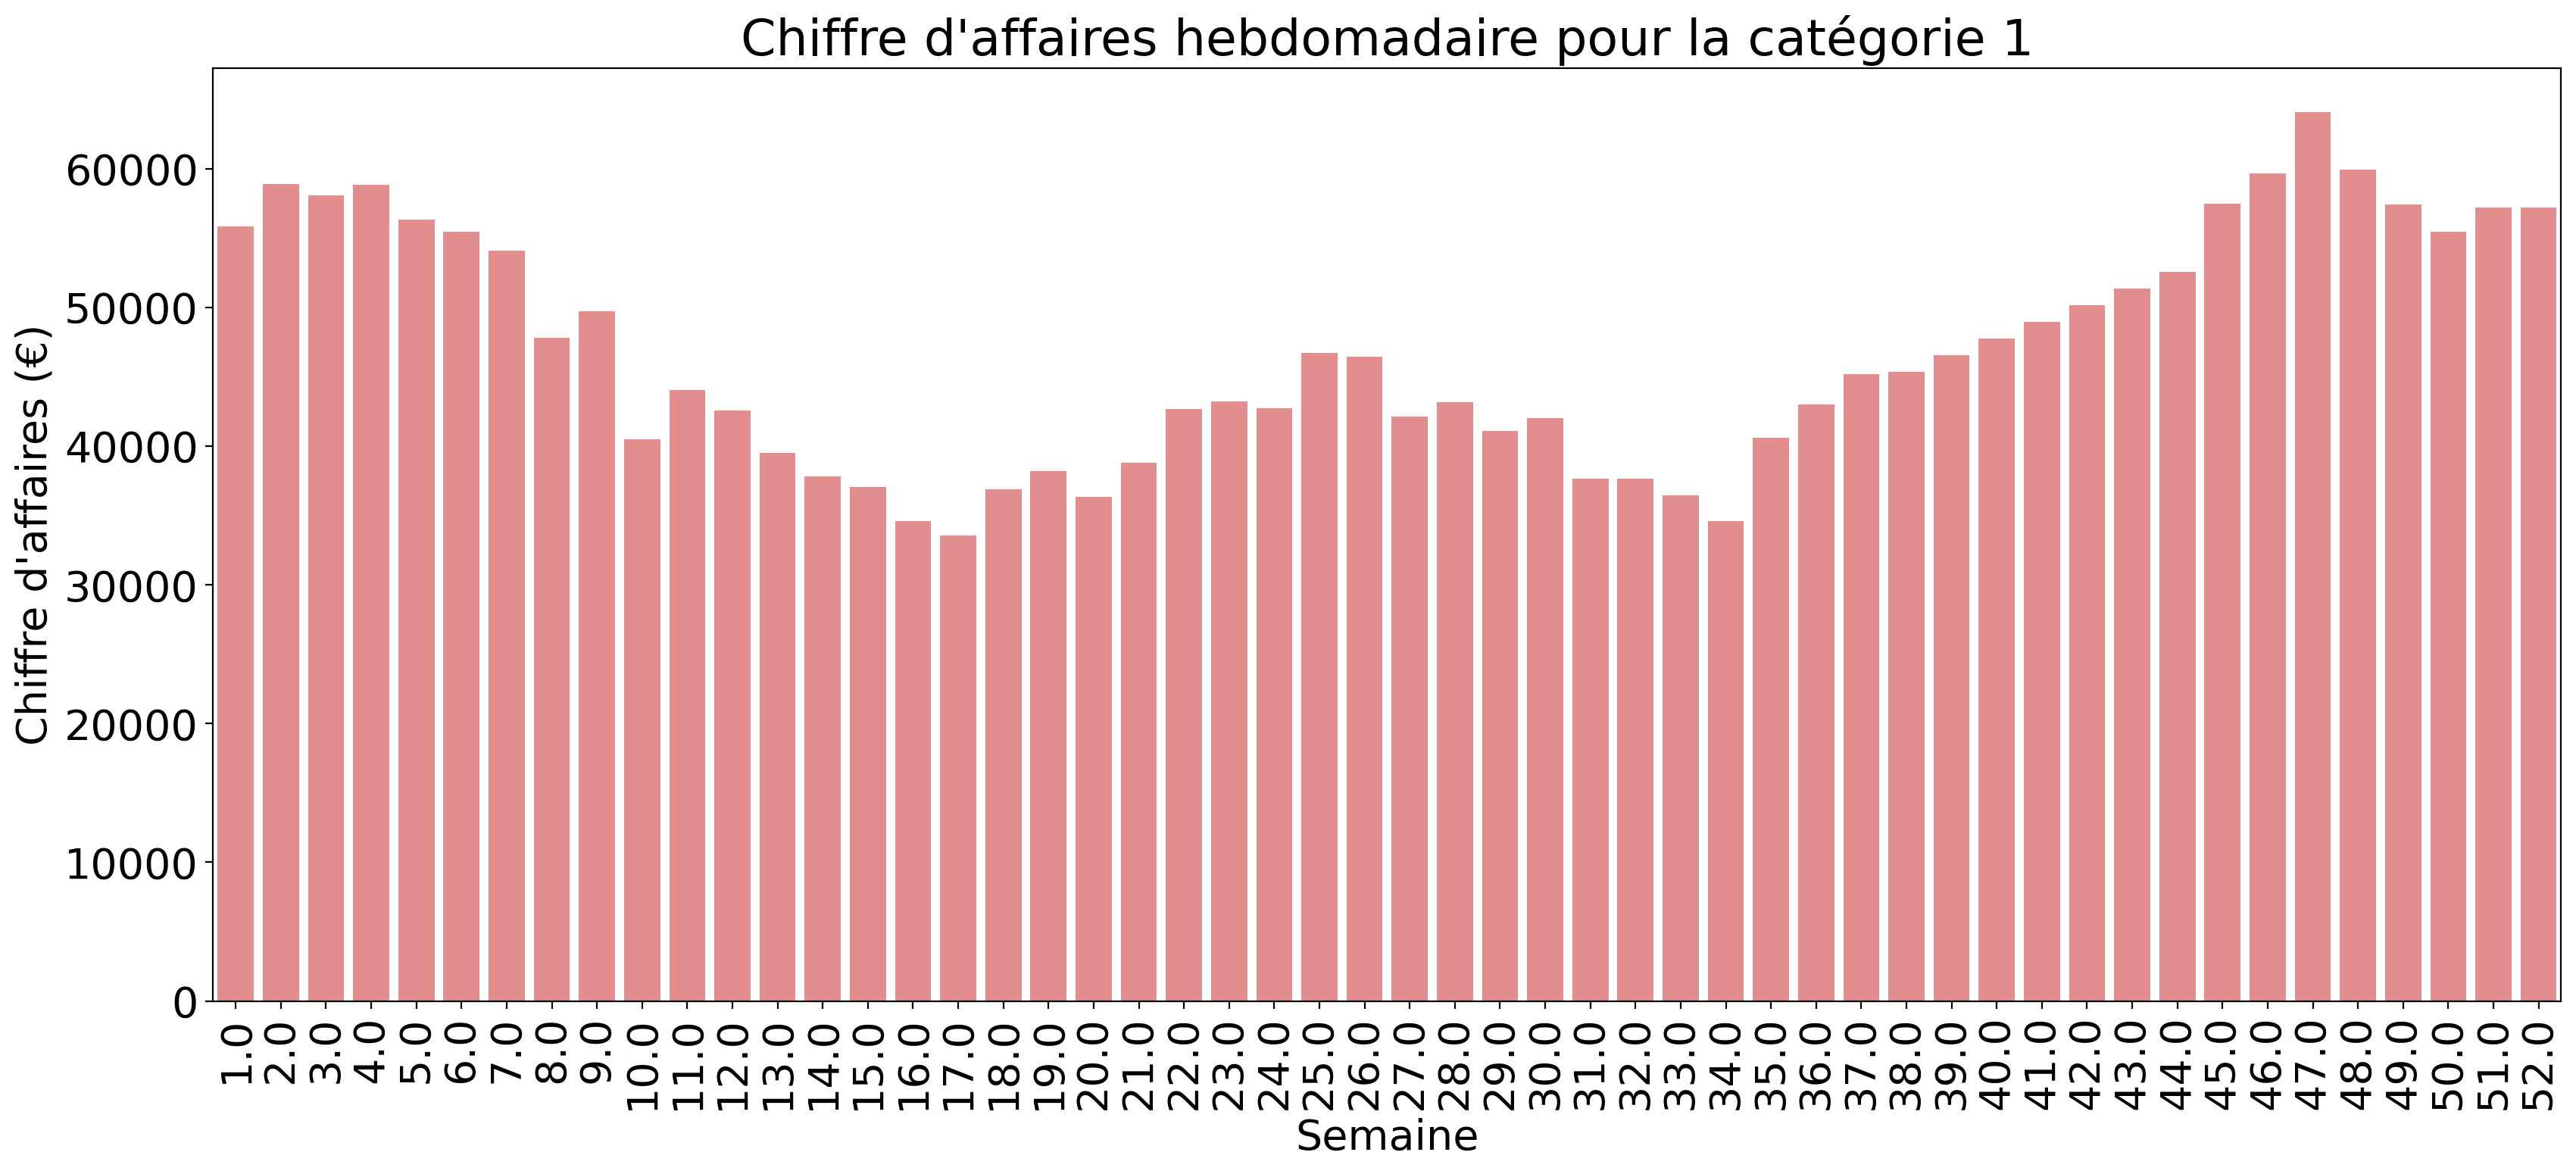

In [15]:
data_librairie_imputation_values_categ1 = data_librairie_imputation_values[data_librairie_imputation_values["categ"] == 1]
data_librairie_imputation_values_categ1["date"] = pd.to_datetime(data_librairie_imputation_values_categ1["date"])
data_librairie_imputation_values_categ1_mont = data_librairie_imputation_values_categ1.groupby(data_librairie_imputation_values_categ1["date"].dt.month).sum()
data_librairie_imputation_values_categ1_week = data_librairie_imputation_values_categ1.groupby(data_librairie_imputation_values_categ1["date"].dt.week).sum()


data_librairie_imputation_values_categ1_mont["month"] = np.linspace(1,12, num= 12)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,8), dpi=200)

#sns.set_color_codes('pastel')
sns.barplot(x="month", y=data_librairie_imputation_values_categ1_mont["price"], 
            data=data_librairie_imputation_values_categ1_mont,
            label='catégorie 1',
            color='lightcoral')
plt.title("Chiffre d'affaires mensuel pour la catégorie 1 ")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Mois")
plt.savefig('./dataset_P4/Categ1_month_imputation.png')

plt.show()


#réorganisation de l'index
data_librairie_imputation_values_categ1_week_clean = data_librairie_imputation_values_categ1_week.sort_values(by = "date" )

data_librairie_imputation_values_categ1_week_clean["week"] = np.linspace(1,52, num= 52)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,8), dpi=200)



sns.barplot(x="week", y="price", 
            data=data_librairie_imputation_values_categ1_week_clean,
            label='catégorie 0',
            color='lightcoral')
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires hebdomadaire pour la catégorie 1")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Semaine")
plt.savefig('./dataset_P4/Categ1_week_imputation.png')

plt.show()

### Analyse des ventes de la catégorie 2

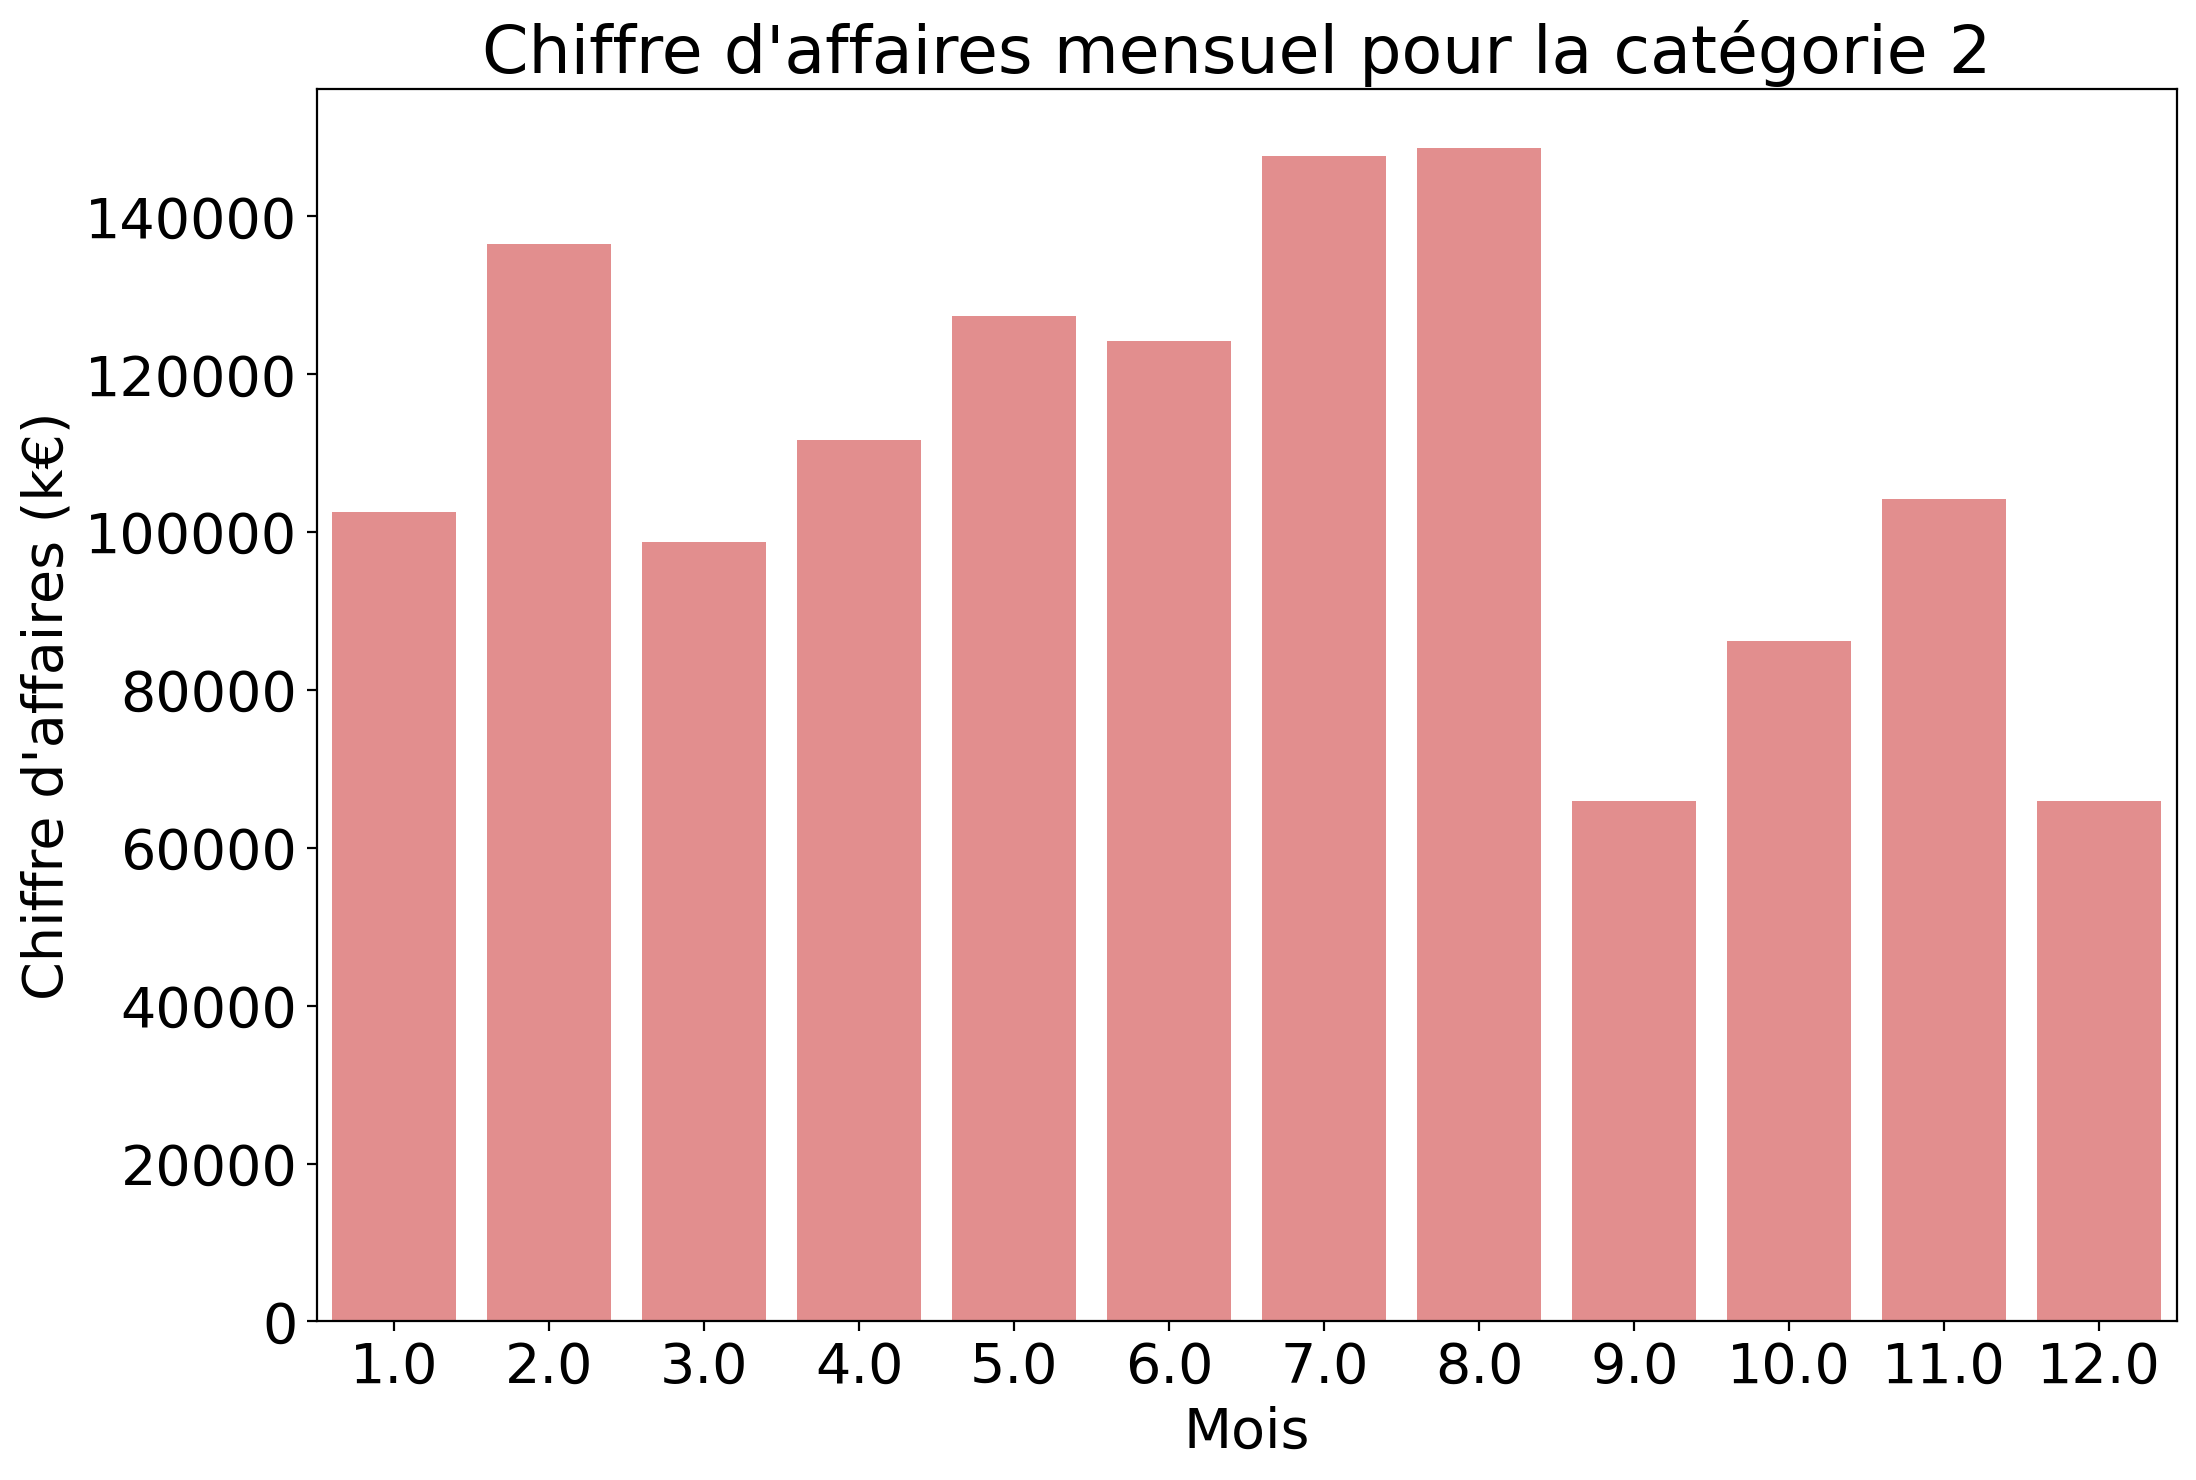

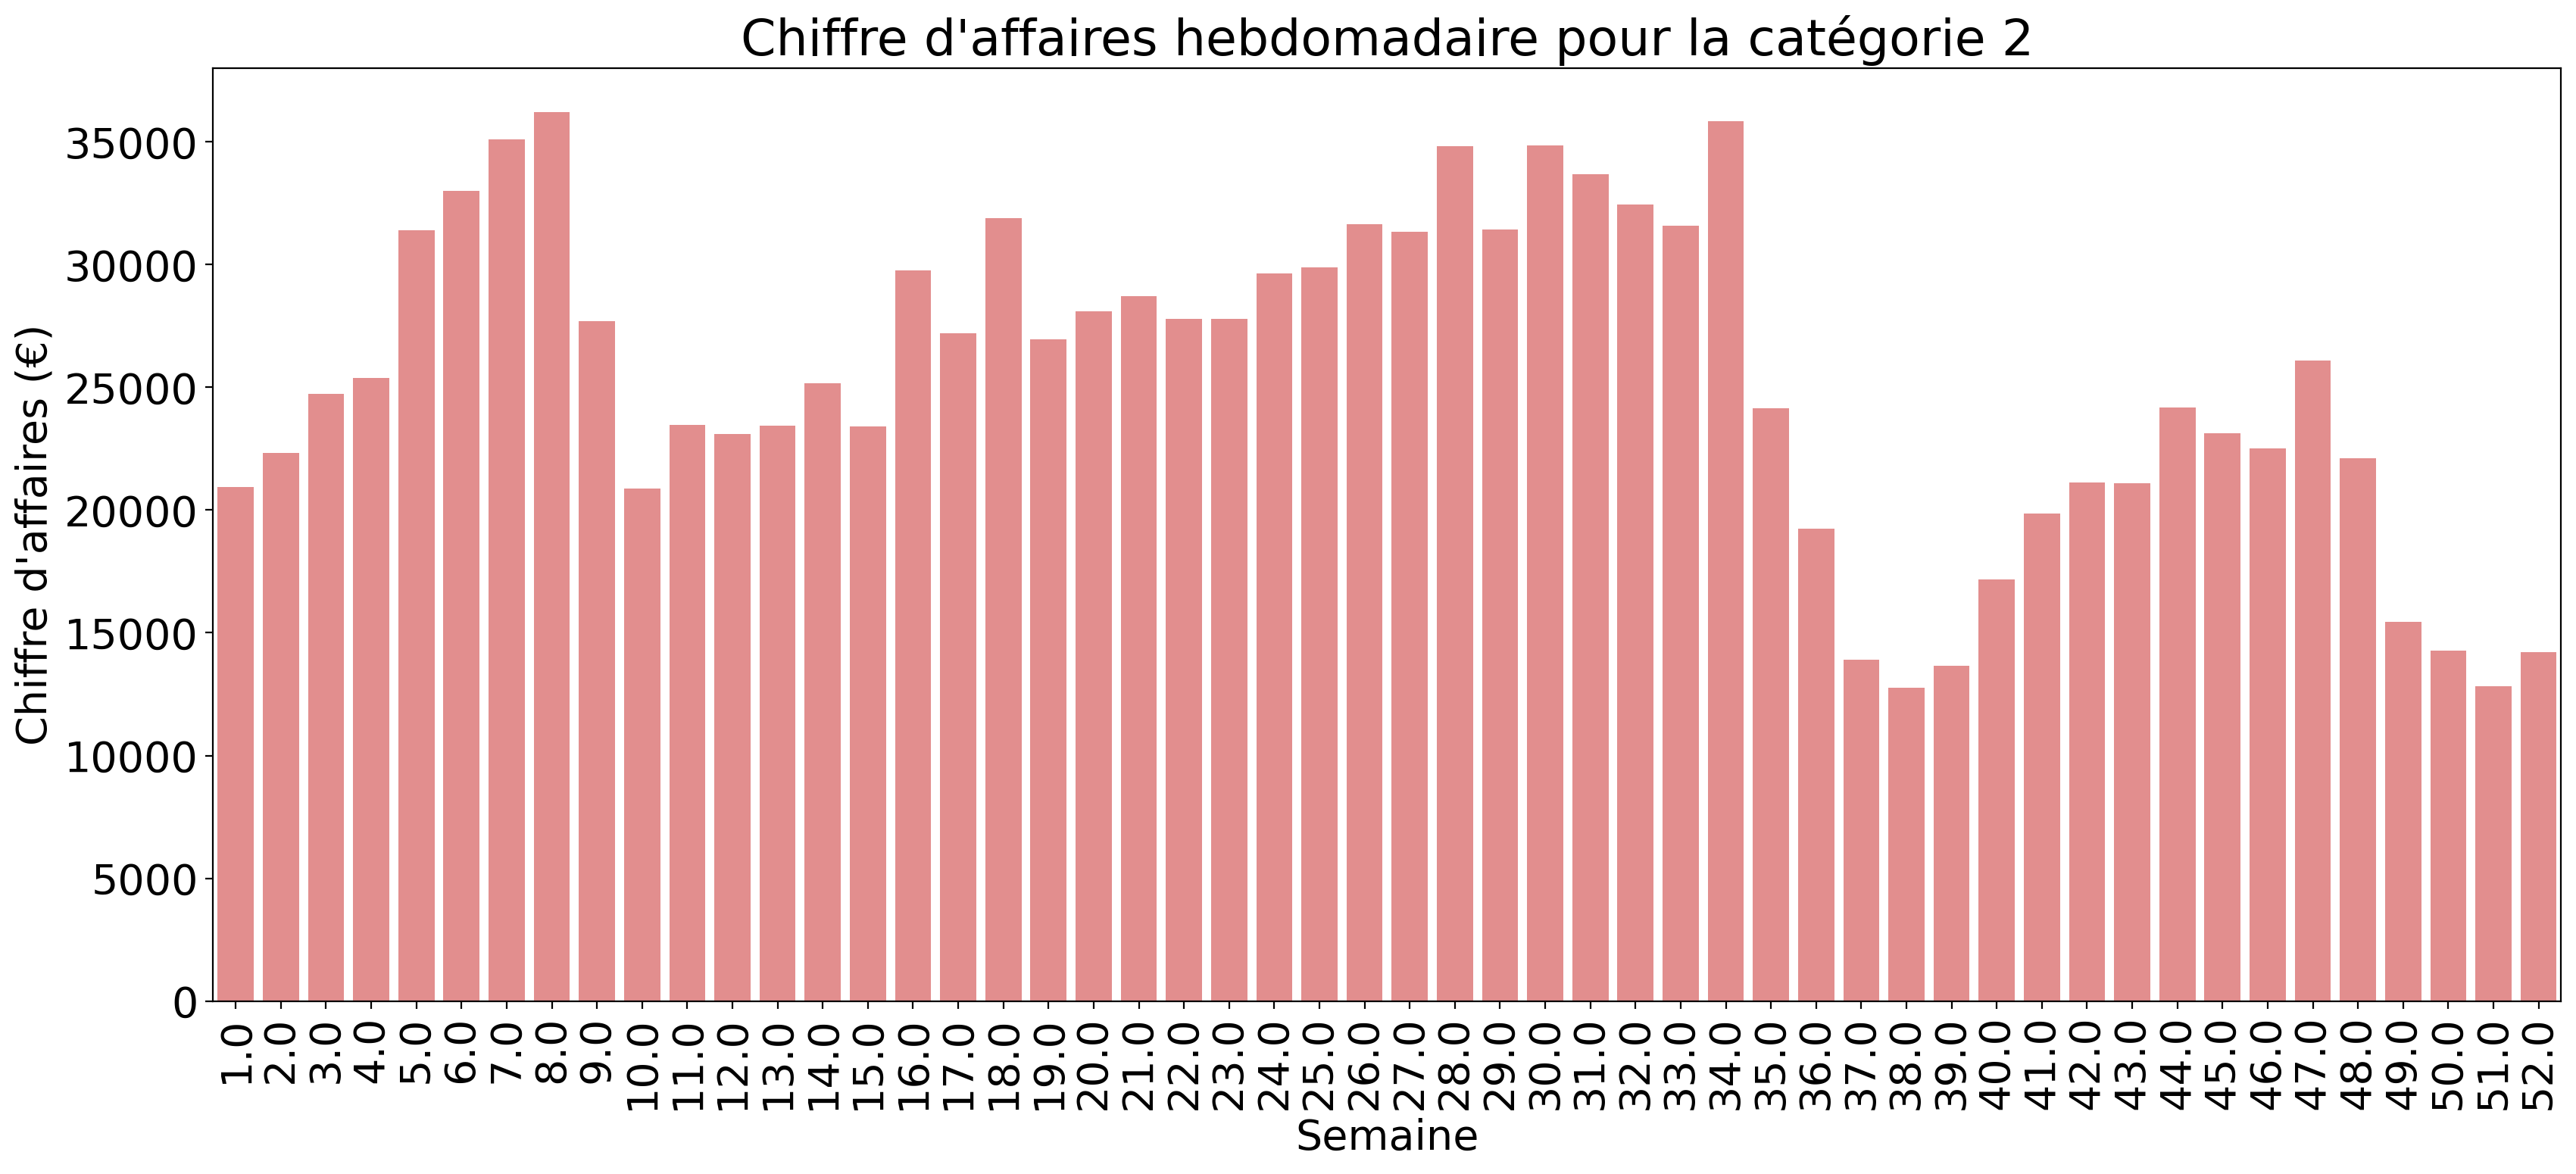

In [16]:
categ2_mont["month"] = np.linspace(1,12, num= 12)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,8), dpi=200)

#sns.set_color_codes('pastel')
sns.barplot(x="month", y=categ2_mont["price"], 
            data=categ2_mont,
            label='catégorie 1',
            color='lightcoral')
plt.title("Chiffre d'affaires mensuel pour la catégorie 2 ")
plt.ylabel("Chiffre d'affaires (k€)")
plt.xlabel("Mois")
plt.show()

categ2_week["week"] = np.linspace(1,52, num= 52)
plt.style.use('default')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,8), dpi=200)

sns.barplot(x="week", y="price", 
            data=categ2_week,
            label='catégorie 0',
            color='lightcoral')
plt.xticks(rotation=90)
plt.title("Chiffre d'affaires hebdomadaire pour la catégorie 2")
plt.ylabel("Chiffre d'affaires (€)")
plt.xlabel("Semaine")
plt.show()

## Récapitulatif des informations  supprimées, modifiées ou pertinentes 

### données supprimés

- 1 produit sans prix ni catégorie => id_prod = 0_2245
- 22 produits n'ont pas été vendu cette année => id_prod = 0_1016, 0_1780, 0_1062, 0_1119, 0_1014, 1_0, 0_1318, 0_1800, 0_1645, 0_322, 0_1620, 0_1025, 2_87, 1_394, 2_72, 0_310, 0_1624, 0_525, 2_86, 0_299, 0_510 et 0_2308
- 1 produit test qui a un prix négatif => id_prod = T_0


### données modifiées

-Ajout de 5 produits ( de 3_w39 à 3_w43 avec des prix correspondant 12653, 47767, 48962, 50157, 24593), d'un client (c_imput) et d'une session d'achat (s_imput). Le processus de remplacement des données manquantes avec des valeurs substituées à été réaliser pour représenter une progression linéaire avec les données hebdomadaire précédentes et suivantes. 


### données pertinente
- Outliers : une valeur ou une observation qui est « distante » des autres observations effectuées sur les achats, c'est-à-dire qu'elle contraste grandement avec les valeurs « normalement » mesurées. 4 gros consomateurs => id_client = c_1609, c_3454, c_4958, c_6714.



## Transferts des données en CSV


In [14]:
data_librairie_imputation_values.to_csv(path_or_buf="dataset_P4/data_librairie.csv") # crée fichier CSV avec Dataframe

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
